In [1]:
from clean2 import *
# from clean2 import data_wrangling 


In [2]:
# data wrangling
df = data_wrangling()
df

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME,PREV_EXITS,PREV_ENTRIES,HOURLY_TRAFFIC
192876,2016-09-16 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,5554,271,PM,Friday,0.000000,0.000000,0.000000
192875,2016-09-16 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,5554,271,PM,Friday,0.000000,0.000000,0.000000
192874,2016-09-16 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,5554,271,AM,Friday,0.000000,0.000000,0.000000
192873,2016-09-16 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,5554,271,AM,Friday,0.000000,0.000000,0.000000
192872,2016-09-16 01:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,01:00:00,5554,271,AM,Friday,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2016-08-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,5799833,1966214,PM,Saturday,18.208048,25.584027,43.792075
3,2016-08-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,5799610,1966155,PM,Saturday,18.208048,25.584027,43.792075
2,2016-08-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,5799492,1966079,AM,Saturday,18.208048,25.584027,43.792075
1,2016-08-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,5799463,1966044,AM,Saturday,18.208048,25.584027,43.792075


### Confirm 'EXITS' has been renamed; # of unique count prev_exits and prev_entries confirms how many non-mean and non-zero values were brought about by our cleaning

In [3]:
if 'EXITS' in df.columns:
    print("Yes")
else:
    print("No")

Yes


### Confirm ENTRIES and EXITS have more than 2 unique values (not all are <0 or >20000)

In [4]:
entries_unique = list(df.PREV_ENTRIES.value_counts()) 
len(entries_unique)

1172

In [5]:
exits_unique = list(df.PREV_EXITS.value_counts())
len(exits_unique)

880

In [6]:
df.index

Int64Index([192876, 192875, 192874, 192873, 192872, 192871, 192870, 192869,
            192868, 192867,
            ...
                 9,      8,      7,      6,      5,      4,      3,      2,
                 1,      0],
           dtype='int64', length=580893)

### Add in DAILY_ENTRIES and DAILY_EXITS by summing prev_entries/prev_exits by C/A, UNIT, SCP, STATION grouped by Date

In [7]:
#df['DAILY_ENTRIES'] = 

In [8]:
df.tail()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME,PREV_EXITS,PREV_ENTRIES,HOURLY_TRAFFIC
4,2016-08-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,5799833,1966214,PM,Saturday,18.208048,25.584027,43.792075
3,2016-08-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,5799610,1966155,PM,Saturday,18.208048,25.584027,43.792075
2,2016-08-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,5799492,1966079,AM,Saturday,18.208048,25.584027,43.792075
1,2016-08-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,5799463,1966044,AM,Saturday,18.208048,25.584027,43.792075
0,2016-08-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,5799442,1966041,AM,Saturday,18.208048,25.584027,43.792075


In [9]:
#df['DAILY_ENTRIES'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'PREV_ENTRIES']).sum()
#df['DAILY_EXITS'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'PREV_EXITS']).sum()

### Add in HOURLY_TRAFFIC

In [10]:
df['HOURLY_TRAFFIC'] = df.PREV_EXITS + df.PREV_ENTRIES

In [11]:
df.sample(20)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME,PREV_EXITS,PREV_ENTRIES,HOURLY_TRAFFIC
104776,2016-09-16 09:00:00,N562,R426,00-00-02,NEPTUNE AV,F,IND,09/16/2016,09:00:00,4419847,1130545,AM,Friday,18.208048,25.584027,43.792075
164970,2016-09-16 09:00:00,R401,R445,00-00-01,3 AV 138 ST,6,IRT,09/16/2016,09:00:00,98002,101337,AM,Friday,18.208048,25.584027,43.792075
62949,2016-09-13 13:00:00,N120A,R153,01-05-01,UTICA AV,AC,IND,09/13/2016,13:00:00,0,158,PM,Tuesday,0.000000,0.000000,0.000000
174673,2016-09-14 13:00:00,R521,R327,00-06-01,52 ST,7,IRT,09/14/2016,13:00:00,35239576,17621125,PM,Wednesday,18.208048,25.584027,43.792075
159838,2016-09-04 09:00:00,R293,R133,00-00-04,MOSHOLU PKWY,4,IRT,09/04/2016,09:00:00,4142072,3016050,AM,Sunday,18.208048,25.584027,43.792075
82309,2016-09-03 16:00:00,N330,R202,00-03-02,63 DR-REGO PARK,MR,IND,09/03/2016,16:00:00,206720,765338,PM,Saturday,18.208048,25.584027,43.792075
143392,2016-09-11 09:00:00,R221,R170,01-06-01,14 ST-UNION SQ,456LNQR,IRT,09/11/2016,09:00:00,69720157,2367307,AM,Sunday,18.208048,25.584027,43.792075
35163,2016-08-27 09:00:00,JFK03,R536,00-03-01,JFK JAMAICA CT1,E,IND,08/27/2016,09:00:00,111801,137771,AM,Saturday,0.000000,0.000000,0.000000
130461,2016-09-09 08:00:00,R158,R084,00-06-01,59 ST COLUMBUS,1ABCD,IRT,09/09/2016,08:00:00,1036441615,1222132686,AM,Friday,18.208048,25.584027,43.792075
165339,2016-09-07 07:26:36,R329,R362,00-00-00,ALLERTON AV,25,IRT,09/07/2016,07:26:36,6766318,2684684,AM,Wednesday,18.208048,25.584027,43.792075


### Add in top 10 stations by hourly traffic

In [12]:
df.groupby('STATION').HOURLY_TRAFFIC.sum().sort_values(ascending=False)[:10]

STATION
34 ST-PENN STA     507552.307649
23 ST              493896.798881
42 ST-PORT AUTH    458913.778837
FULTON ST          438582.136431
125 ST             398369.985538
CANAL ST           390387.054684
34 ST-HERALD SQ    367681.247180
CHAMBERS ST        352211.315022
57 ST-7 AV         329630.374332
TIMES SQ-42 ST     314761.947667
Name: HOURLY_TRAFFIC, dtype: float64

In [13]:
best_turnstile = df['HOURLY_TRAFFIC'].idxmax()
df.loc[best_turnstile,]

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME,PREV_EXITS,PREV_ENTRIES,HOURLY_TRAFFIC
115530,2016-09-12 16:18:41,PTH17,R541,01-00-00,THIRTY THIRD ST,1,PTH,09/12/2016,16:18:41,3,405089,PM,Monday,18.208048,0.000000,18.208048
115530,2016-08-31 05:23:08,PTH16,R550,01-01-06,LACKAWANNA,1,PTH,08/31/2016,05:23:08,3910,3340,AM,Wednesday,18.208048,25.584027,43.792075
115530,2016-09-07 07:57:59,PTH16,R550,01-00-03,LACKAWANNA,1,PTH,09/07/2016,07:57:59,13821,15848,AM,Wednesday,15847.000000,13819.000000,29666.000000


In [14]:
df.groupby(['STATION']).count()
#there are 374 stations

,DATE_TIME,C/A,UNIT,SCP,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,AMPM,DAY_NAME,PREV_EXITS,PREV_ENTRIES,HOURLY_TRAFFIC
STATION,,,,,,,,,,,,,,,
1 AV,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250
103 ST,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908
103 ST-CORONA,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161
104 ST,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133
110 ST,780,780,780,780,780,780,780,780,780,780,780,780,780,780,780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODHAVEN BLVD,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432,2432
WOODLAWN,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
WORLD TRADE CTR,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408


In [15]:
daily_count = df.groupby(['DATE']).count().iloc[:,0].reset_index().rename(
    columns={'DATE_TIME':'row_counts'})

In [16]:
daily_count.head()


,DATE,row_counts
0,08/27/2016,27290
1,08/28/2016,27300
2,08/29/2016,27828
3,08/30/2016,27775
4,08/31/2016,27352


In [27]:
daily_station_total = df.groupby(['STATION','DATE'])[['PREV_ENTRIES','PREV_EXITS', 'HOURLY_TRAFFIC']]\
    .sum().rename(columns = {'PREV_ENTRIES':'daily_entries','PREV_EXITS':'daily_exits', 'HOURLY_TRAFFIC':'daily_traffic'}).reset_index()

In [30]:
daily_station_total.tail()

,STATION,DATE,daily_entries,daily_exits,daily_traffic
7827,ZEREGA AV,09/12/2016,588.432622,436.993162,1025.425784
7828,ZEREGA AV,09/13/2016,614.016649,436.993162,1051.009811
7829,ZEREGA AV,09/14/2016,562.848595,436.993162,999.841757
7830,ZEREGA AV,09/15/2016,614.016649,436.993162,1051.009811
7831,ZEREGA AV,09/16/2016,646.600676,473.409259,1120.009935


In [ ]:
stations = daily_station_total.STATION.nunique()

fig, ax = plt.subplots(figsize=(30,10))

ax.barh(np.arange(daily_station_total.shape[0]), daily_station_total.daily_traffic, align='center', color='skyblue', ecolor='black')
# fig, ax = plt.subplots(figsize=(30, 10))
# y = np.arange(daily_station_total.shape[0])
# ax.barh(y, daily_station_total.daily_traffic, align='center', color='skyblue', ecolor='black')

fig, ax = plt.subplots(figsize=(30,10))
ax.barh(x=stations, y=daily_station_total.daily_traffic, align='center', color='skyblue', ecolor='black', width=-0.4)


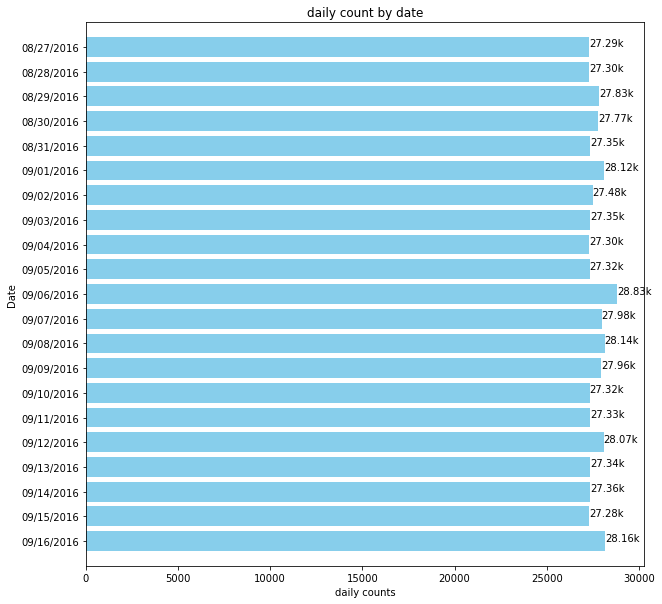

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
y_pos = np.arange(daily_count.shape[0])

ax.barh(y_pos, daily_count.row_counts, align='center',
        color='skyblue', ecolor='black')

# add some text for labels, title and axes ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(daily_count.DATE)
ax.set_ylim((-1, daily_count.shape[0]))
ax.invert_yaxis()
ax.set_xlabel('daily counts')
ax.set_ylabel('Date')
ax.set_title('daily count by date')

# add value label for each bar
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38,'{0:.2f}k'.format(i.get_width()/1000) , fontsize=10,color='black')